# Telco Churn Prediction

 - This notebook aims to build and evaluate various models to predict customer churn in a Telco company. We will use the cleaned and preprocessed dataset from Milestone 1 to train different classification models.



### 1. Loading the Normalized and Cleaned dataset from previous assignment:
    
    - Import all necessary libraries for data manipulation and visualization.

In [148]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [149]:
df= pd.read_csv(r"A:\Data Analytics\Telco\data\Normalized_Churn_Dataset.csv")
df.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Total Revenue,Gender,Age,Under 30,Senior Citizen,Married,Churn Label,Churn Score,ContractPeriod,ContractTenureRatio
0,-0.918278,-0.650409,-1.278988,-0.445478,-3.054010,-1.485900,-0.854176,0.525927,-0.760820,-0.612975,...,-1.038179,0.990532,1.880110,-0.498313,2.273159,-0.966622,1.663829,1.535060,-0.881056,-0.642239
1,1.088995,-0.317185,-0.993743,2.233093,0.327438,1.685430,1.170719,0.525927,0.675378,-0.172176,...,-0.701705,-1.009559,1.641292,-0.498313,2.273159,1.034530,1.663829,0.495781,-0.881056,-0.156647
2,-0.918278,-0.650409,-0.586250,1.340236,0.327438,-0.773969,1.170719,0.525927,0.675378,1.542040,...,-0.392106,0.990532,1.462179,-0.498313,2.273159,-0.966622,1.663829,1.062661,-0.881056,0.537056
3,1.088995,-0.317185,-0.301005,0.447379,0.327438,-0.191480,-0.854176,0.525927,0.675378,-0.417064,...,-0.013746,-1.009559,1.880110,-0.498313,2.273159,1.034530,1.663829,1.393340,-0.881056,1.022648
4,1.088995,-0.317185,0.187986,0.447379,0.327438,-1.097574,1.170719,0.525927,0.675378,-0.319109,...,0.023601,-1.009559,1.999519,-0.498313,2.273159,1.034530,1.663829,0.401301,-0.881056,1.855092


<Axes: >

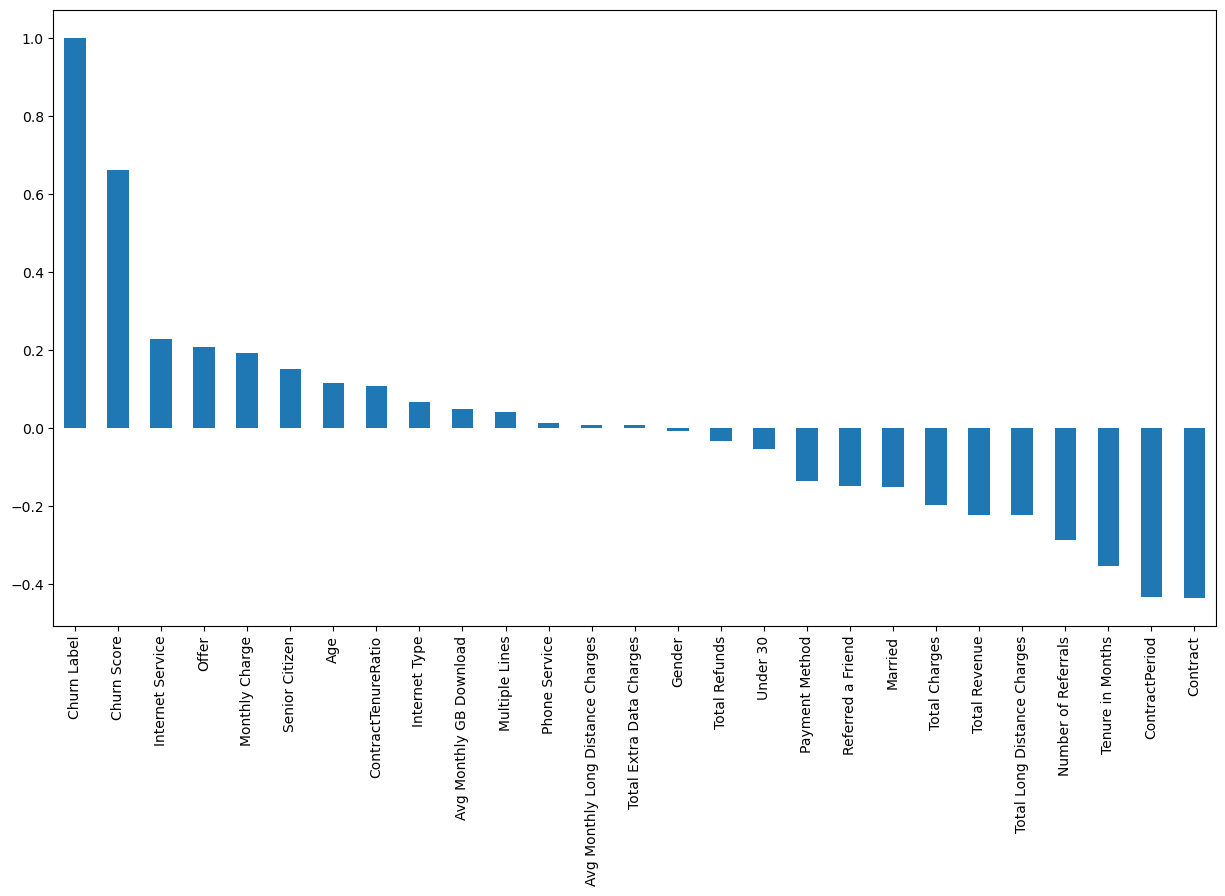

In [150]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Churn Label'].sort_values(ascending = False).plot(kind='bar')

### 2. Performing Feature Scaling:

In [151]:
# Scaling to Numerical features:

from sklearn.preprocessing import MinMaxScaler

# Initiating MinMaxScaler
scaler = MinMaxScaler()

numerical_columns = df.select_dtypes(include=[float, int]).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Total Revenue,Gender,Age,Under 30,Senior Citizen,Married,Churn Label,Churn Score,ContractPeriod,ContractTenureRatio
0,0.0,0.000000,0.000000,0.25,0.0,0.00,0.0,1.0,0.5,0.094118,...,0.003261,1.0,0.967213,0.0,1.0,0.0,1.0,0.945055,0.0,0.013889
1,1.0,0.090909,0.098592,1.00,1.0,0.98,1.0,1.0,1.0,0.200000,...,0.083877,0.0,0.901639,0.0,1.0,1.0,1.0,0.703297,0.0,0.111111
2,0.0,0.000000,0.239437,0.75,1.0,0.22,1.0,1.0,1.0,0.611765,...,0.158053,1.0,0.852459,0.0,1.0,0.0,1.0,0.835165,0.0,0.250000
3,1.0,0.090909,0.338028,0.50,1.0,0.40,0.0,1.0,1.0,0.141176,...,0.248704,0.0,0.967213,0.0,1.0,1.0,1.0,0.912088,0.0,0.347222
4,1.0,0.090909,0.507042,0.50,1.0,0.12,1.0,1.0,1.0,0.164706,...,0.257652,0.0,1.000000,0.0,1.0,1.0,1.0,0.681319,0.0,0.513889


### 3. Model Creation

   ### Step-by-Step Plan for Implementing the Telco Churn Model

    - Metrics to Evaluate: Accuracy, Precision, Recall, F1 Score, ROC AUC.
    - Split the data into training and testing sets.
    - Choose and Implement Models
    - Train Models
    - Evaluate Models and interpret results
    - Deploy Model
    - Monitor and control the model

In [152]:
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [154]:
# Storing the results of different models:

results = pd.DataFrame(columns=["Model Name", "Accuracy", "F1-score", "ROC"])

In [155]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score, precision_score, recall_score, accuracy_score


# Define results DataFrame
results = pd.DataFrame(columns=["Model Name", "Accuracy", "F1-score", "ROC"])

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label="ROC Curve (area = %0.2f)" % auc_score)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristics")
    plt.legend(loc="lower right")
    plt.show()

def display_test_results(model_name, model):
    # Fit the model on training data
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
   
    # Confusion Matrix
    print("--------------Confusion Matrix--------------")
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print(c_matrix)

    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()

    # Classification Report
    print("--------------Classification Report--------------")
    print(classification_report(y_test, y_test_pred))

    # More Specific Classification Report
    TP = c_matrix[1, 1]
    TN = c_matrix[0, 0]
    FP = c_matrix[0, 1]
    FN = c_matrix[1, 0]

    # Accuracy
    print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:", TP / float(TP + FN))

    # Specificity
    print("Specificity:", TN / float(TN + FP))

    # F1 Score
    print("F1-Score:", f1_score(y_test, y_test_pred))

    # Predicted Probability
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]  # Changed x_test to X_test

    # ROC AUC
    print("--------------ROC--------------")
    roc_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

    # Plot ROC Curve
    draw_roc(y_test, y_test_pred_proba)

    # Add all metrics score in final results store
    results.loc[len(results)] = [model_name, metrics.accuracy_score(y_test, y_test_pred), f1_score(y_test, y_test_pred), roc_auc]



### 3.1. Random Forest Model:

In [156]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier
clf = RandomForestClassifier(random_state=10)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [157]:
 #Define the Random Forest model with parameters
    
random_forest_model = RandomForestClassifier(bootstrap=True,
                                             max_depth=5,
                                             min_samples_leaf=50,
                                             min_samples_split=50,
                                             max_features=10,
                                             n_estimators=100,
                                             random_state=10)

Random Forest Model results:
--------------Confusion Matrix--------------
[[1477   75]
 [  57  504]]


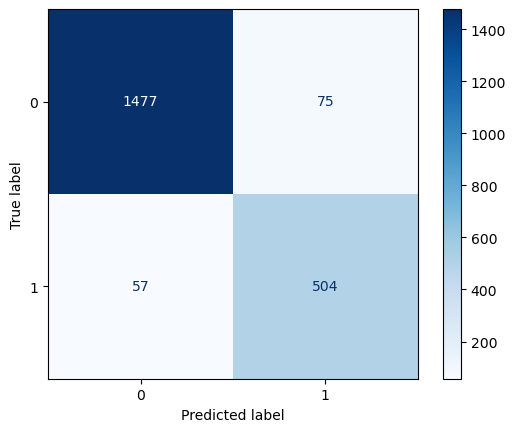

--------------Classification Report--------------
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1552
         1.0       0.87      0.90      0.88       561

    accuracy                           0.94      2113
   macro avg       0.92      0.93      0.92      2113
weighted avg       0.94      0.94      0.94      2113

Accuracy: 0.9375295787979177
Sensitivity: 0.8983957219251337
Specificity: 0.9516752577319587
F1-Score: 0.8842105263157894
--------------ROC--------------


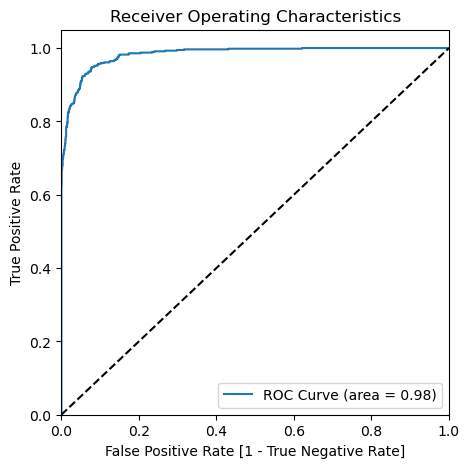

In [158]:
# Display results for the Random Forest model

print("Random Forest Model results:")
display_test_results("Random Forest", random_forest_model)

## 3.2. Logistic Regression:

In [159]:
# Initialize and train logistic regression model
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [160]:
# Predict on the test data
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

Logistic Regression Model results:
--------------Confusion Matrix--------------
[[1474   78]
 [  77  484]]


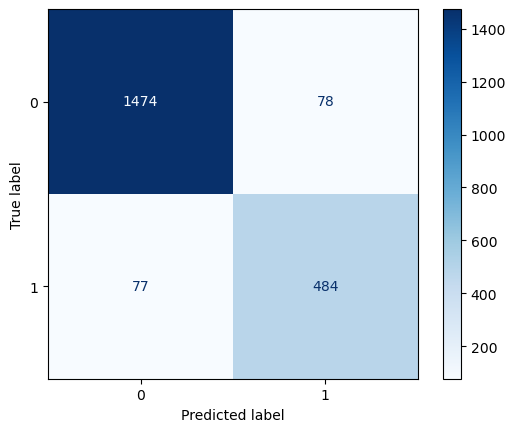

--------------Classification Report--------------
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1552
         1.0       0.86      0.86      0.86       561

    accuracy                           0.93      2113
   macro avg       0.91      0.91      0.91      2113
weighted avg       0.93      0.93      0.93      2113

Accuracy: 0.9266445811642214
Sensitivity: 0.8627450980392157
Specificity: 0.9497422680412371
F1-Score: 0.8619768477292965
--------------ROC--------------


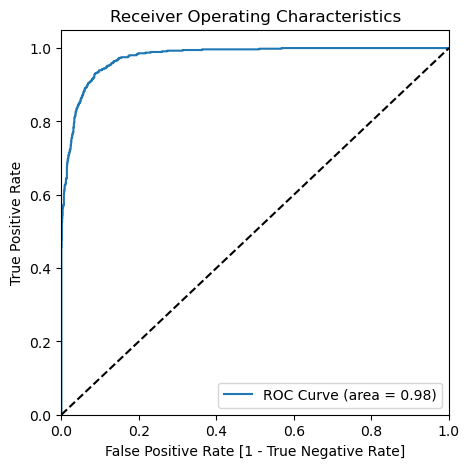

In [161]:
# Display results for the Logistic Regression model:
print("Logistic Regression Model results:")
display_test_results("Logistic Regression", log_reg_model)

### 3.3. KNeighborsClassifier Model:

In [162]:
# Import necessary libraries

from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors

# Fit the model to the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

KNeighborsClassifier Model results:
--------------Confusion Matrix--------------
[[1429  123]
 [ 176  385]]


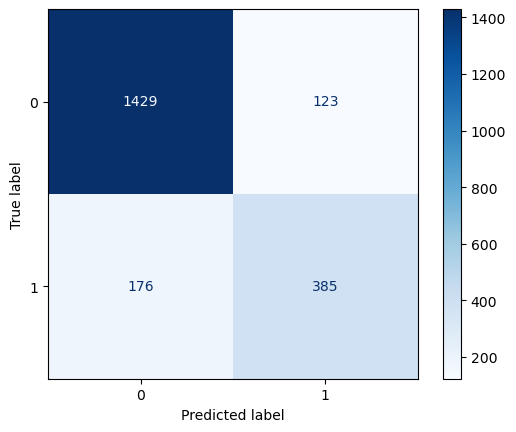

--------------Classification Report--------------
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91      1552
         1.0       0.76      0.69      0.72       561

    accuracy                           0.86      2113
   macro avg       0.82      0.80      0.81      2113
weighted avg       0.86      0.86      0.86      2113

Accuracy: 0.8584950307619499
Sensitivity: 0.6862745098039216
Specificity: 0.9207474226804123
F1-Score: 0.7202993451824135
--------------ROC--------------


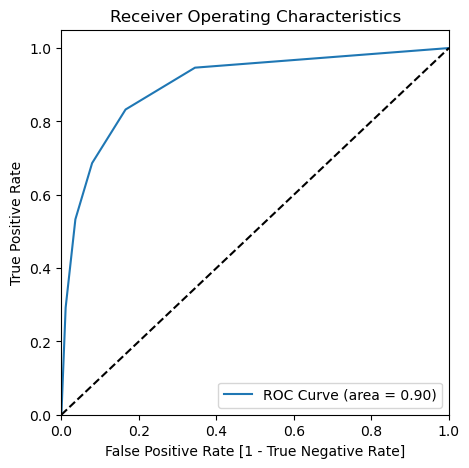

In [163]:
# Display results for the KNeighborsClassifier model:

print("KNeighborsClassifier Model results:")
display_test_results("KNeighborsClassifier Model results", knn_model)

### 3.4. Decision Tree Classifier Model: 

In [164]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree Classifier
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)

# Make predictions
y_pred = dtc_model.predict(X_test)

DecisionTreeClassifier Model results:
--------------Confusion Matrix--------------
[[1463   89]
 [  76  485]]


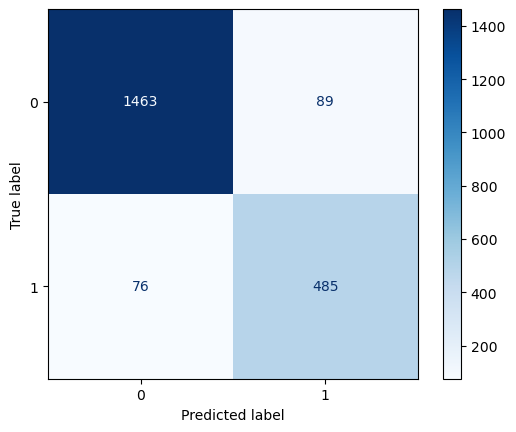

--------------Classification Report--------------
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      1552
         1.0       0.84      0.86      0.85       561

    accuracy                           0.92      2113
   macro avg       0.90      0.90      0.90      2113
weighted avg       0.92      0.92      0.92      2113

Accuracy: 0.9219119734973971
Sensitivity: 0.8645276292335116
Specificity: 0.9426546391752577
F1-Score: 0.8546255506607929
--------------ROC--------------


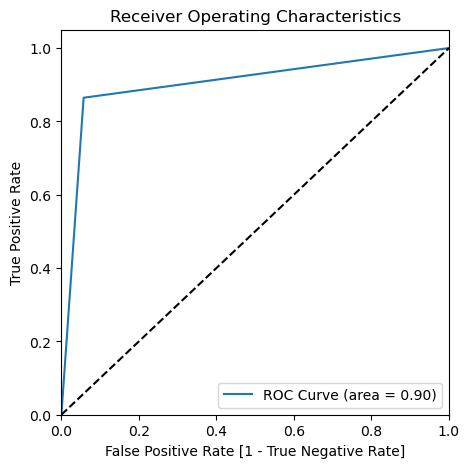

In [165]:
# Display results for the KDecisionTreeClassifierr model:

print("DecisionTreeClassifier Model results:")
display_test_results("DecisionTreeClassifier", dtc_model)

### 3.5. Neural networks:

In [166]:
import tensorflow as tf
from tensorflow import keras

In [167]:
model = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(26,), activation='relu'),  # Updated input shape
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model/adding the hyperparameters
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [168]:
# Train the model on the train dataset
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/10
155/155 [==============================] - 2s 4ms/step - loss: 0.5042 - accuracy: 0.7617 - val_loss: 0.3884 - val_accuracy: 0.8348
Epoch 2/10
155/155 [==============================] - 0s 3ms/step - loss: 0.3312 - accuracy: 0.8588 - val_loss: 0.3008 - val_accuracy: 0.8803
Epoch 3/10
155/155 [==============================] - 0s 3ms/step - loss: 0.2489 - accuracy: 0.8939 - val_loss: 0.2337 - val_accuracy: 0.9063
Epoch 4/10
155/155 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9140 - val_loss: 0.2138 - val_accuracy: 0.9106
Epoch 5/10
155/155 [==============================] - 0s 3ms/step - loss: 0.1846 - accuracy: 0.9203 - val_loss: 0.2005 - val_accuracy: 0.9195
Epoch 6/10
155/155 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9237 - val_loss: 0.1922 - val_accuracy: 0.9214
Epoch 7/10
155/155 [==============================] - 0s 3ms/step - loss: 0.1689 - accuracy: 0.9260 - val_loss: 0.1964 - val_accuracy: 0.9233
Epoch 

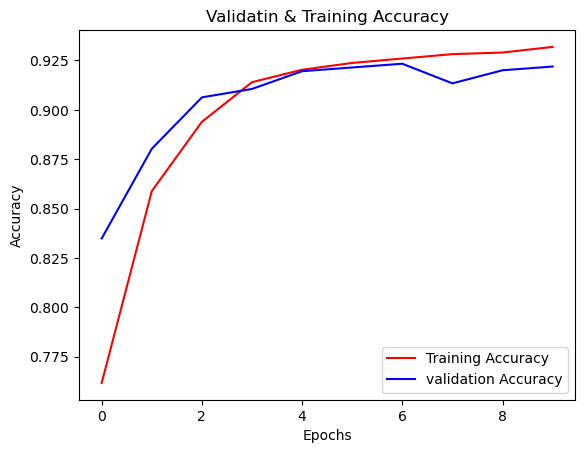

In [169]:
# plotting a chart for training accuracy

acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']

plt.plot(acc_train, 'r', label='Training Accuracy')
plt.plot(acc_val, 'b', label='validation Accuracy')
plt.title('Validatin & Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [170]:
# evalute the model
model.evaluate(X_test,y_test)

67/67 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9219


[0.1935422271490097, 0.9219119548797607]

### 3.6. Ensembles - ADABoost

In [171]:
from sklearn.ensemble import AdaBoostClassifier

# Create the base model (Decision Tree)
base_model = DecisionTreeClassifier(max_depth=1)  # Simple Decision Tree

# Create the AdaBoost model
ada_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

AdaBoostClassifier Model results:
--------------Confusion Matrix--------------
[[1486   66]
 [  64  497]]


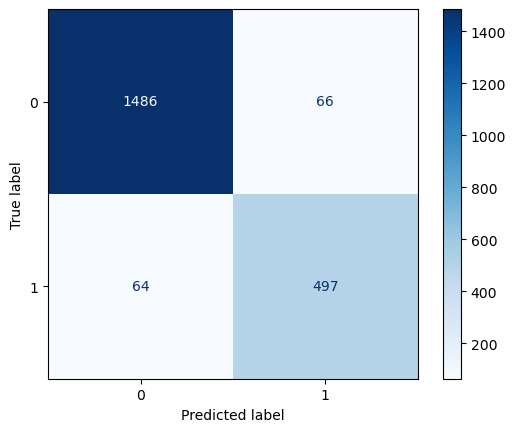

--------------Classification Report--------------
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1552
         1.0       0.88      0.89      0.88       561

    accuracy                           0.94      2113
   macro avg       0.92      0.92      0.92      2113
weighted avg       0.94      0.94      0.94      2113

Accuracy: 0.9384761003312825
Sensitivity: 0.8859180035650623
Specificity: 0.9574742268041238
F1-Score: 0.8843416370106761
--------------ROC--------------


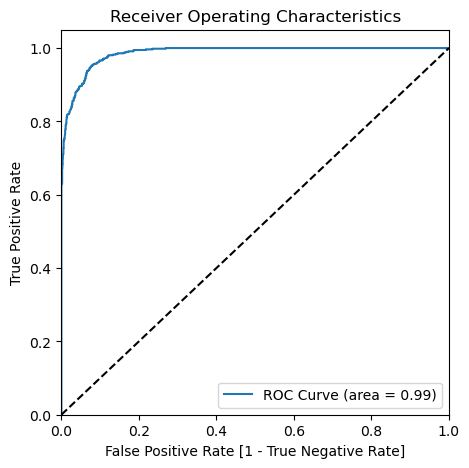

In [172]:
# Display results for the AdaBoostClassifier model:

print("AdaBoostClassifier Model results:")
display_test_results("AdaBoostClassifier", ada_model)

### 3.7. Support Vector Machine Model:

In [173]:
from sklearn.svm import SVC


svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train, y_train)



SVC(kernel='linear', probability=True)

SVC Model results:
--------------Confusion Matrix--------------
[[1467   85]
 [  73  488]]


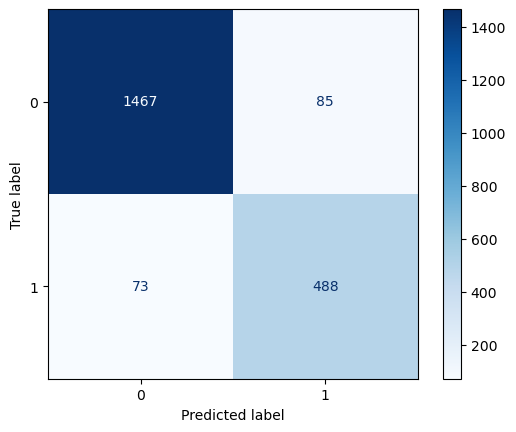

--------------Classification Report--------------
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1552
         1.0       0.85      0.87      0.86       561

    accuracy                           0.93      2113
   macro avg       0.90      0.91      0.90      2113
weighted avg       0.93      0.93      0.93      2113

Accuracy: 0.9252247988641742
Sensitivity: 0.8698752228163993
Specificity: 0.9452319587628866
F1-Score: 0.8606701940035273
--------------ROC--------------


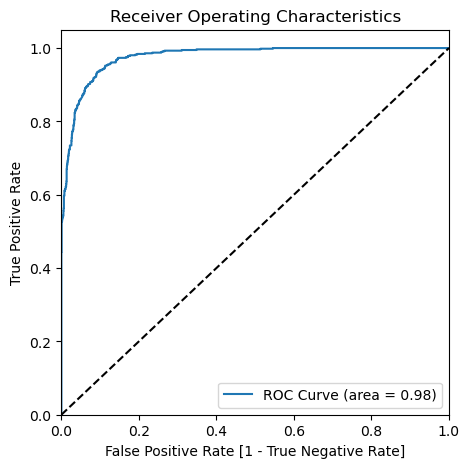

In [174]:
# Display results for the SVC model:

print("SVC Model results:")
display_test_results("SVC", svc_model)

### 4. Evaluating the performance of different models

    - Calculate performance metrics for each model.
    - Summarize the performance of each model in a table
    

In [175]:
# Loading ther results of the above model:

sorted_results = results.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print(sorted_results)

                           Model Name  Accuracy  F1-score       ROC
0                  AdaBoostClassifier  0.938476  0.884342  0.986288
1                       Random Forest  0.937530  0.884211  0.983443
2                 Logistic Regression  0.926645  0.861977  0.976327
3                                 SVC  0.925225  0.860670  0.976252
4              DecisionTreeClassifier  0.921912  0.854626  0.903591
5  KNeighborsClassifier Model results  0.858495  0.720299  0.900941


##### Summary of Model Results

Best Performing Models: 
        - AdaBoostClassifier and Random Forest both show the highest performance across all metrics, with the highest accuracy, F1-score, and ROC AUC.
        
Good Performers: 
        - Logistic Regression and SVC also show strong performance, though slightly less so compared to AdaBoost and Random Forest.
        
Weaker Models: 
        - Decision Tree and KNeighborsClassifier have lower scores, particularly in the ROC AUC and F1-score, indicating they may not perform as well in distinguishing and balancing between classes.
        
The choice of the best model would typically consider not just these metrics but also practical aspects like interpretability, training time, and computational resources.

The model need to be trained again and again to give better performance results.

### 5. Model Validation using Binary Classification & Multi-Class Classification:

In [188]:
# Make predictions
y_prob = model.predict(X_test)  # Probabilities for each class

# Convert probabilities to class labels
y_pred = np.argmax(y_prob, axis=1)

# Calculate metrics
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


10/10 [==============================] - 0s 5ms/step
Accuracy: 0.7366666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       106
           1       0.71      0.76      0.74        99
           2       0.70      0.66      0.68        95

    accuracy                           0.74       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.74      0.74      0.74       300



In [189]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Generate random binary classification data with valid parameters
X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    n_classes=2, 
    n_clusters_per_class=2, 
    n_informative=10,  # Ensure this is large enough
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a simple Sequential model for binary classification
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_prob = model.predict(X_test)  # Probabilities for binary classification

# Convert probabilities to class labels
y_pred = (y_prob > 0.5).astype(int)

# Evaluate the model
print("Binary Classification:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate random multi-class classification data with valid parameters
X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    n_classes=3, 
    n_clusters_per_class=2, 
    n_informative=15,  # Ensure this is large enough
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a Sequential model for multi-class classification
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_prob = model.predict(X_test)  # Probabilities for multi-class classification

# Convert probabilities to class labels
y_pred = np.argmax(y_prob, axis=1)

# Evaluate the model
print("Multi-Class Classification:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/10
18/18 [==============================] - 1s 17ms/step - loss: 0.6224 - accuracy: 0.6661 - val_loss: 0.4838 - val_accuracy: 0.8357
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 0.4215 - accuracy: 0.8321 - val_loss: 0.3686 - val_accuracy: 0.8929
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.3248 - accuracy: 0.8893 - val_loss: 0.2991 - val_accuracy: 0.9143
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.2691 - accuracy: 0.9089 - val_loss: 0.2501 - val_accuracy: 0.9214
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 0.2324 - accuracy: 0.9339 - val_loss: 0.2145 - val_accuracy: 0.9429
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.9411 - val_loss: 0.2009 - val_accuracy: 0.9357
Epoch 7/10
18/18 [==============================] - 0s 5ms/step - loss: 0.1796 - accuracy: 0.9500 - val_loss: 0.1794 - val_accuracy: 0.9500
Epoch 8/10
18/18 [=

Binary Classification: The model has a high accuracy (92%), suggesting strong performance in distinguishing between two classes.

Multi-Class Classification: The model has a moderate accuracy (72.67%), indicating good performance but with room for improvement in distinguishing among multiple classes.

### 6. Saving the dataset

In [192]:
# Save model results to CSV
results_df.to_csv('model_evaluation_results.csv')